# SALES FORCASTING:


#### Importing Packages and Data:

In [1]:
# Importing packages:

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing
from sklearn.impute import KNNImputer

In [2]:
# Importing the dataset:

store_df = pd.read_csv("store.csv")
train_df = pd.read_csv("train.csv", parse_dates=["Date"])
test_df = pd.read_csv("test.csv", parse_dates=["Date"]) 

c:\Users\aparn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Data Review and describe:

In [3]:
# Store Dataset:

store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [4]:
# Shape of store dataset:

print("Store dataset has ",store_df.shape[1]," columns and ",store_df.shape[0]," rows.")

Store dataset has  10  columns and  1115  rows.


In [5]:
# Info of store dataset:

print("The count of non-missing values and data type of each variable of store dataset are as follows:")
store_df.info()

The count of non-missing values and data type of each variable of store dataset are as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
# Descriptive statistics of store data:

print("The descriptive statistics of each variable of store dataset are as follow:")
store_df.describe()

The descriptive statistics of each variable of store dataset are as follow:


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
# percentage of missing value in store dataset:

print("Percentage of missing value of each column in store dataset:")
percent_missing = store_df.isnull().sum() * 100 / len(store_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

Percentage of missing value of each column in store dataset:


,percent_missing
Store,0.000000
StoreType,0.000000
Assortment,0.000000
CompetitionDistance,0.269058
CompetitionOpenSinceMonth,31.748879
CompetitionOpenSinceYear,31.748879
Promo2,0.000000
Promo2SinceWeek,48.789238
Promo2SinceYear,48.789238
PromoInterval,48.789238


In [8]:
# train Dataset:

train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [9]:
# Shape of train dataset:

print("Train dataset has ",train_df.shape[1]," columns and ",train_df.shape[0]," rows.")

Train dataset has  9  columns and  1017209  rows.


In [10]:
# Info of train dataset:

print("The count of non-missing values and data type of each variable of train dataset are as follows:")
train_df.info()

The count of non-missing values and data type of each variable of train dataset are as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [11]:
# Descriptive statistics of train data:

print("The descriptive statistics of each variable of train dataset are as follow:")
train_df.describe()

The descriptive statistics of each variable of train dataset are as follow:


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
# percentage of missing value in train dataset:

print("Percentage of missing value of each column in train dataset:")
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

Percentage of missing value of each column in train dataset:


,percent_missing
Store,0.0
DayOfWeek,0.0
Date,0.0
Sales,0.0
Customers,0.0
Open,0.0
Promo,0.0
StateHoliday,0.0
SchoolHoliday,0.0


In [13]:
# test Dataset:

test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0
5,10,4,2015-09-17,NaN,NaN,1.0,1,0,0
6,11,4,2015-09-17,NaN,NaN,1.0,1,0,0
7,12,4,2015-09-17,NaN,NaN,1.0,1,0,0
8,13,4,2015-09-17,NaN,NaN,1.0,1,0,0
9,14,4,2015-09-17,NaN,NaN,1.0,1,0,0


In [14]:
# Shape of test dataset:

print("Test dataset has ",test_df.shape[1]," columns and ",test_df.shape[0]," rows.")

Test dataset has  9  columns and  41088  rows.


In [15]:
# Info of test dataset:

print("The count of non-missing values and data type of each variable of test dataset are as follows:")
test_df.info()

The count of non-missing values and data type of each variable of test dataset are as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          41088 non-null  int64         
 1   DayOfWeek      41088 non-null  int64         
 2   Date           41088 non-null  datetime64[ns]
 3   Sales          0 non-null      float64       
 4   Customers      0 non-null      float64       
 5   Open           41077 non-null  float64       
 6   Promo          41088 non-null  int64         
 7   StateHoliday   41088 non-null  object        
 8   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 2.8+ MB


In [16]:
# Descriptive statistics of test data:

print("The descriptive statistics of each variable of test dataset are as follow:")
test_df.describe()

The descriptive statistics of each variable of test dataset are as follow:


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,0.0,0.0,41077.000000,41088.000000,41088.000000
mean,555.899533,3.979167,NaN,NaN,0.854322,0.395833,0.443487
std,320.274496,2.015481,NaN,NaN,0.352787,0.489035,0.496802
min,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,279.750000,2.000000,NaN,NaN,1.000000,0.000000,0.000000
50%,553.500000,4.000000,NaN,NaN,1.000000,0.000000,0.000000
75%,832.250000,6.000000,NaN,NaN,1.000000,1.000000,1.000000
max,1115.000000,7.000000,NaN,NaN,1.000000,1.000000,1.000000


In [17]:
# percentage of missing value in test dataset:

print("Percentage of missing value of each column in test dataset:")
percent_missing = test_df.isnull().sum() * 100 / len(test_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

Percentage of missing value of each column in test dataset:


,percent_missing
Store,0.000000
DayOfWeek,0.000000
Date,0.000000
Sales,100.000000
Customers,100.000000
Open,0.026772
Promo,0.000000
StateHoliday,0.000000
SchoolHoliday,0.000000


In [18]:
print("store_df is duplicated:",store_df.duplicated().unique())
print("train_df is duplicated:",train_df.duplicated().unique())
print("test_df is duplicated:",test_df.duplicated().unique())

store_df is duplicated: [False]
train_df is duplicated: [False]
test_df is duplicated: [False]


<AxesSubplot:>

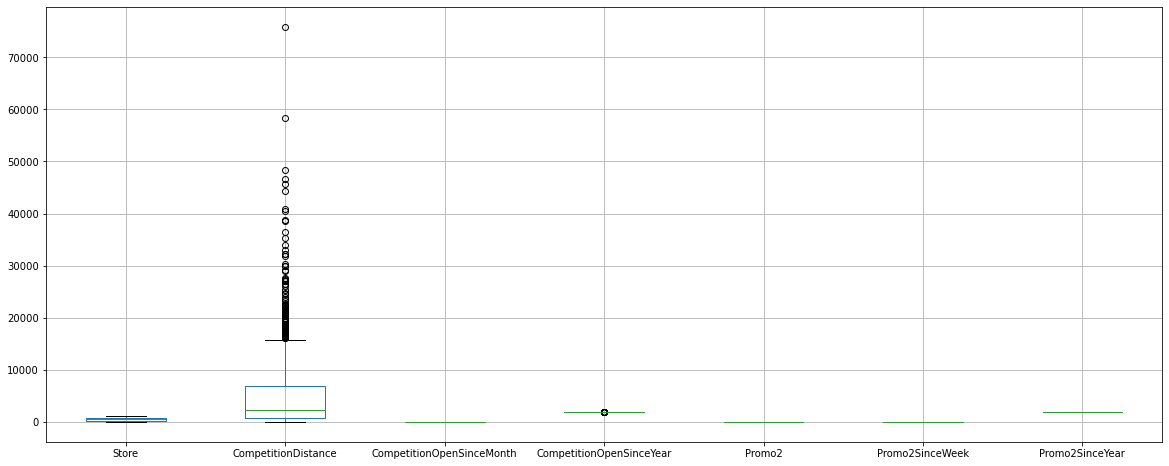

In [19]:
plt.rcParams['figure.figsize'] = (20, 8)
store_df.boxplot()

<AxesSubplot:>

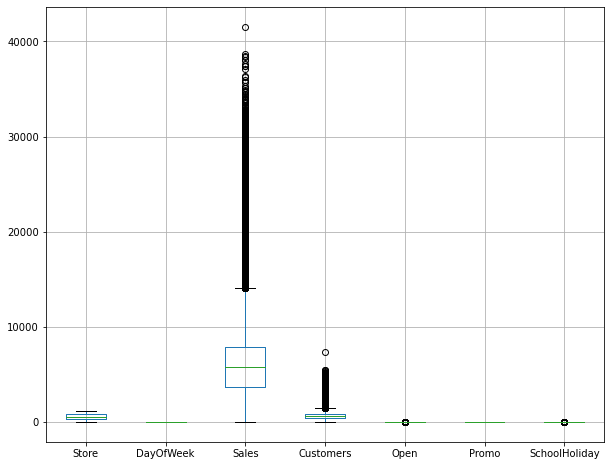

In [20]:
plt.rcParams['figure.figsize'] = (10, 8)
train_df.boxplot()

<AxesSubplot:>

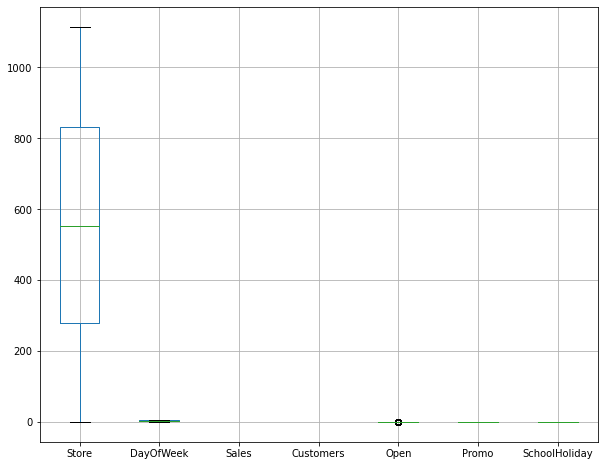

In [21]:
plt.rcParams['figure.figsize'] = (10, 8)
test_df.boxplot()

#### Link Data:

In [22]:
# Merging Store and train dataset:

merge_store_train_df = pd.merge(train_df,store_df, on = ['Store'], how = 'left') # Merge based on store as it is the common column in both the dataset
merge_store_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [23]:
# Mergining Store and test dataset:

merge_store_test_df = pd.merge(test_df,store_df, on = ['Store'], how = 'left') # Merge based on store as it is the common column in both the dataset
merge_store_test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
5,10,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
6,11,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
7,12,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
8,13,4,2015-09-17,NaN,NaN,1.0,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
9,14,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"


In [24]:
# To download the dataframe:

# dfi.export(merge_store_train_df.head(), "merge_store_train_df.png")
# dfi.export(merge_store_test_df.head(), "merge_store_test_df.png")
# dfi.export(store_df.head(), "store_df.png")
# dfi.export(train_df.head(), "train_df.png")
# dfi.export(test_df.head(), "test_df.png")

In [25]:
# Shape of mergered dataset:

print("merge_store_train_df has ",merge_store_train_df.shape[1]," columns and ",merge_store_train_df.shape[0]," rows.")
print("merge_store_test_df has ",merge_store_test_df.shape[1]," columns and ",merge_store_test_df.shape[0]," rows.")

merge_store_train_df has  18  columns and  1017209  rows.
merge_store_test_df has  18  columns and  41088  rows.


In [26]:
# percentage of missing value in merge_store_train_df dataset:

print("Percentage of missing value of each column in merge_store_train_df dataset:")
percent_missing = merge_store_train_df.isnull().sum() * 100 / len(merge_store_train_df)
trainmissing_value_df = pd.DataFrame({'percent_missing': percent_missing})
trainmissing_value_df

Percentage of missing value of each column in merge_store_train_df dataset:


,percent_missing
Store,0.000000
DayOfWeek,0.000000
Date,0.000000
Sales,0.000000
Customers,0.000000
Open,0.000000
Promo,0.000000
StateHoliday,0.000000
SchoolHoliday,0.000000
StoreType,0.000000


In [27]:
# percentage of missing value in merge_store_test_df dataset:

print("Percentage of missing value of each column in merge_store_test_df dataset:")
percent_missing = merge_store_test_df.isnull().sum() * 100 / len(merge_store_test_df)
testmissing_value_df = pd.DataFrame({'percent_missing': percent_missing})
testmissing_value_df

Percentage of missing value of each column in merge_store_test_df dataset:


,percent_missing
Store,0.000000
DayOfWeek,0.000000
Date,0.000000
Sales,100.000000
Customers,100.000000
Open,0.026772
Promo,0.000000
StateHoliday,0.000000
SchoolHoliday,0.000000
StoreType,0.000000


In [28]:
merge_store_train_df['StateHoliday'].replace('0',0,inplace = True)

In [29]:
# To download the missing value dataframe:

# dfi.export(testmissing_value_df, "testmissing_value_df.png")
# dfi.export(trainmissing_value_df, "trainmissing_value_df.png")

#### Exploratory Data Analysis:

In [30]:
merge_store_train_df['SalesperCustomer']=merge_store_train_df['Sales']/merge_store_train_df['Customers']

In [31]:
# Convert Date column and extract different parts of the date:

def convert_date(df):
    df['Year']=df.Date.dt.year
    df['Month']=df.Date.dt.month
    df['Day']=df.Date.dt.day
    df['WeekOfYear']=df.Date.dt.isocalendar().week
convert_date(merge_store_train_df)
convert_date(merge_store_test_df)

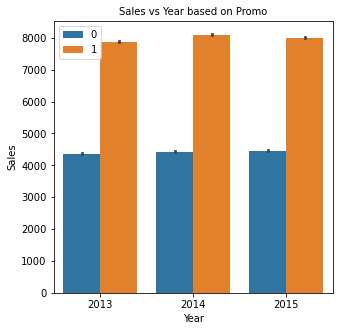

In [32]:
# Visulaising Sales vs Year:

plt.rcParams['figure.figsize'] = (5, 5)
sns.barplot(data=merge_store_train_df, x="Year", y="Sales", hue="Promo")
plt.title('Sales vs Year based on Promo', fontsize = 10)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Countplot for StoreType')

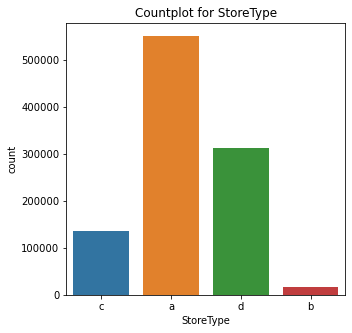

In [33]:
# Visualising the countplot for StoreType:

plt.rcParams['figure.figsize'] = (5, 5)
sns.countplot(data = merge_store_train_df,  x = 'StoreType')
plt.title("Countplot for StoreType")

c:\Users\aparn\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


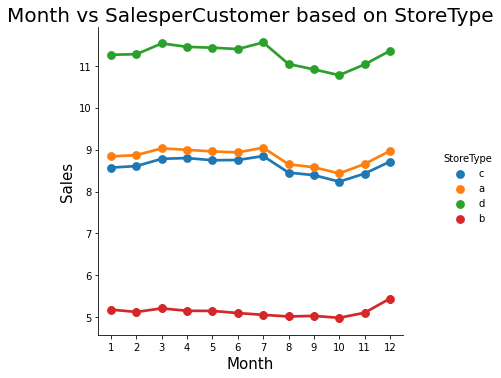

In [34]:
# Visualising the factor plot for Sales per customer for each month based on the StoreType:

plt.rcParams['figure.figsize'] = (19, 9)
sns.factorplot(data = merge_store_train_df, x ="Month", y = "SalesperCustomer", hue = 'StoreType')
plt.title('Month vs SalesperCustomer based on StoreType', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Countplot for Assortment')

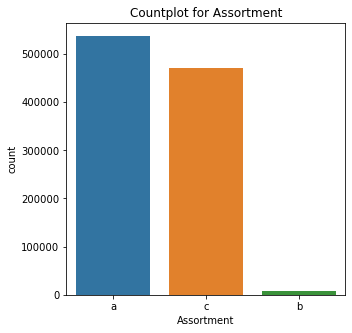

In [35]:
# Visualising the countplot for Assortment:

plt.rcParams['figure.figsize'] = (5, 5)
sns.countplot(data = merge_store_train_df,  x = 'Assortment')
plt.title("Countplot for Assortment")

c:\Users\aparn\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


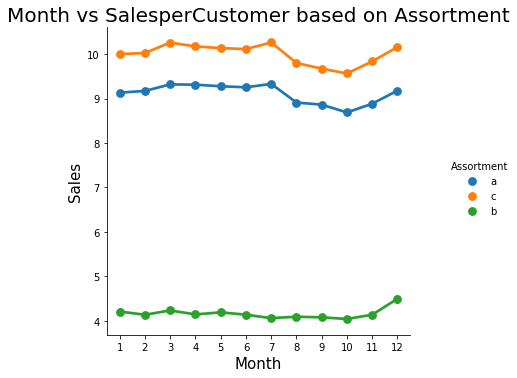

In [36]:
# Visualising the factor plot for Sales per customer for each month based on the Assortment:

plt.rcParams['figure.figsize'] = (19, 9)
sns.factorplot(data = merge_store_train_df, x ="Month", y = "SalesperCustomer", hue = 'Assortment')
plt.title('Month vs SalesperCustomer based on Assortment', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.show()

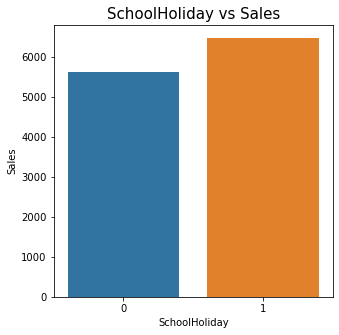

In [37]:
# Visualising bar plot for SchoolHoliday vs Sale:

schoolholi_store_Sales = pd.DataFrame(merge_store_train_df.groupby('SchoolHoliday')['Sales'].mean())
plt.rcParams['figure.figsize'] = (5,5)
schoolholi_store_Sales.columns = ['Sales']
sns.barplot(data=schoolholi_store_Sales,x=schoolholi_store_Sales.index,y='Sales')
plt.title('SchoolHoliday vs Sales', fontsize = 15)
plt.xlabel('SchoolHoliday', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.show()

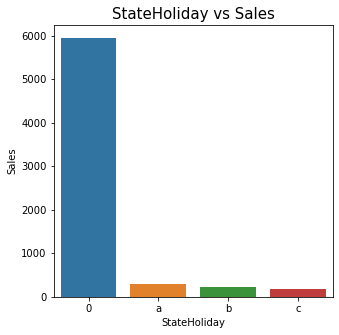

In [38]:
# Visualising bar plot for StateHoliday vs Sale:

stateholi_store_Sales = pd.DataFrame(merge_store_train_df.groupby('StateHoliday')['Sales'].mean())
plt.rcParams['figure.figsize'] = (5, 5)
# sns.barplot(data=merge_store_train_df, y="Sales", x="StateHoliday")
stateholi_store_Sales.columns = ['Sales']
sns.barplot(data=stateholi_store_Sales,x=stateholi_store_Sales.index,y='Sales')
plt.title('StateHoliday vs Sales', fontsize = 15)
plt.xlabel('StateHoliday', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.show()

c:\Users\aparn\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


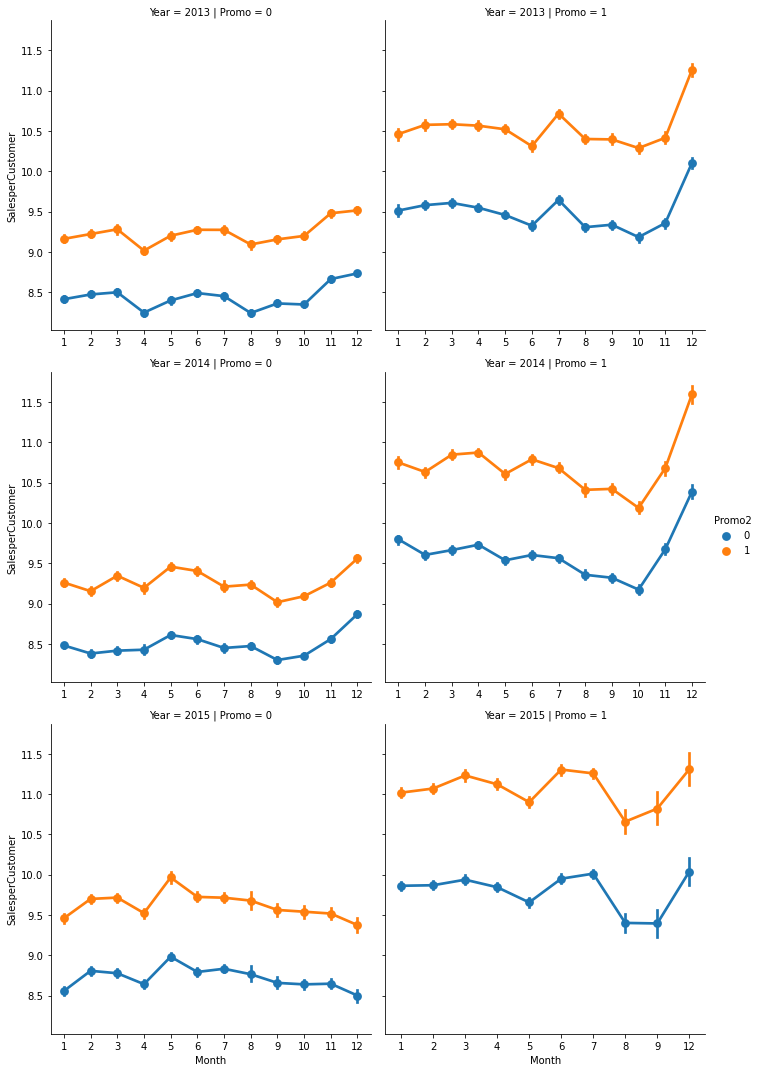

In [39]:
# Visulaising factor plot for Sales per customer for each month for each year & Promo and hue on Promo2:

plt.rcParams['figure.figsize'] = (19, 9)
sns.factorplot(data = merge_store_train_df, x ="Month", y = "SalesperCustomer",  col = 'Promo', hue = 'Promo2', row = "Year",sharex=False)
plt.show()

c:\Users\aparn\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


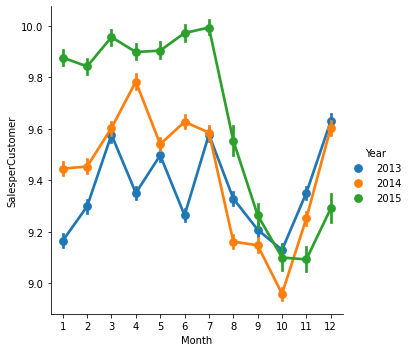

In [40]:
# Visulaising Factorplot for Month vs Sales per customer for each year:

sns.factorplot(data = merge_store_train_df, x ="Month", y = "SalesperCustomer", hue = 'Year')

c:\Users\aparn\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


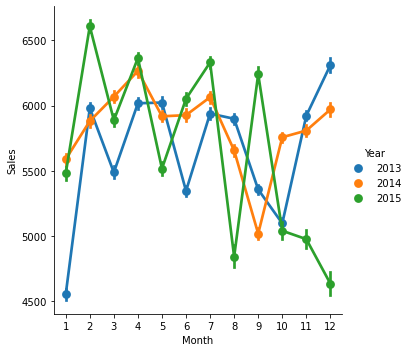

In [41]:
# Visulaising Factorplot for Month vs Sales for each year:

sns.factorplot(data = merge_store_train_df, x ="Month", y = "Sales", hue = 'Year')

Text(0.5, 1.0, 'Top 10 Store sales')

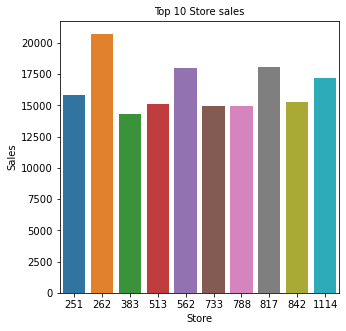

In [42]:
# Visulaising the sales of the top 10 stores:

store_Sales = merge_store_train_df.groupby('Store')['Sales'].mean().sort_values(ascending = False)
df = pd.DataFrame(store_Sales.head(10))
df.columns = ['Sales']
plt.rcParams['figure.figsize'] = (5, 5)
sns.barplot(data = df,x=df.index,y='Sales')
plt.title("Top 10 Store sales", fontsize = 10)

<AxesSubplot:xlabel='CompetitionDistance', ylabel='SalesperCustomer'>

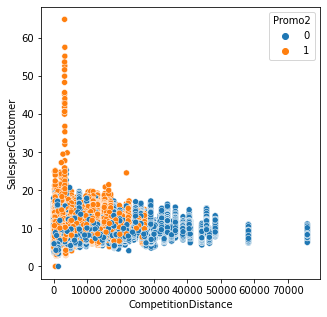

In [43]:
# Visualising the scatterplot of CompetitionDistance vs SalesperCustomer:

sns.scatterplot(data = merge_store_train_df,x='CompetitionDistance',y='SalesperCustomer',hue="Promo2")

#### 5. Missing Values:

In [44]:
no_promo_tillDate_df = merge_store_train_df[merge_store_train_df['Promo2SinceYear'].isnull()]
print("Number of na value for PromoInterval:", no_promo_tillDate_df['PromoInterval'].isnull().sum())
print("Number of rows of df:", no_promo_tillDate_df.shape[0])

Number of na value for PromoInterval: 508031
Number of rows of df: 508031


In [45]:
no_promo_tillDate_df = merge_store_train_df[merge_store_train_df['Promo2SinceYear'].isnull() == False]
print("Number of rows of df:",no_promo_tillDate_df.shape[0])
print("Number of na value for PromoInterval:",no_promo_tillDate_df['PromoInterval'].isnull().sum())

Number of rows of df: 509178
Number of na value for PromoInterval: 0


In [46]:
# No missing values 'Promo2SinceYear','PromoInterval','Promo2SinceWeek': merge_store_train_df
merge_store_train_df['Promo2SinceYear'].fillna(0,inplace = True)
merge_store_train_df['Promo2SinceWeek'].fillna(0,inplace = True)
merge_store_train_df['PromoInterval'].fillna(0,inplace = True)

count    1.014567e+06
mean     5.430086e+03
std      7.715324e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.890000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64


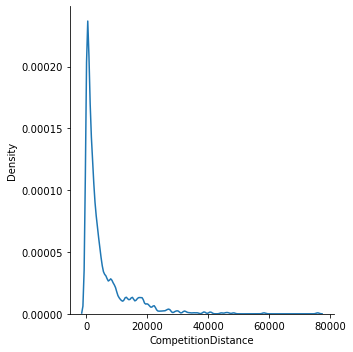

In [47]:
# only missing value for CompetitionDistance:
# Data Visualisation of CompetitionDistance

# competition is not far or near 
print(merge_store_train_df.CompetitionDistance.describe())
sns.displot(data=merge_store_train_df, x='CompetitionDistance', kind="kde")

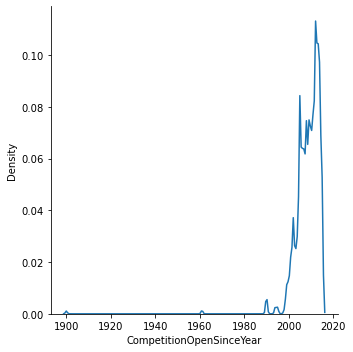

In [48]:
sns.displot(data=merge_store_train_df, x='CompetitionOpenSinceYear', kind="kde")

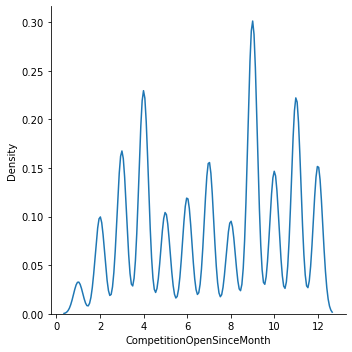

In [49]:
sns.displot(data=merge_store_train_df, x='CompetitionOpenSinceMonth', kind="kde")

In [50]:
# Since it is not normally distributed we cannot replace with mean:

train_knn = merge_store_train_df.copy(deep=True)
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['CompetitionDistance'] = knn_imputer.fit_transform(train_knn[['CompetitionDistance']])
train_knn['CompetitionDistance'].isnull().sum()

0

In [51]:
merge_store_train_df['CompetitionDistance'] = train_knn['CompetitionDistance']
merge_store_train_df['CompetitionDistance'].isnull().sum()

0

In [52]:
# CompetitionOpenSinceYear and CompetitionOpenSinceMonth imputation with mode as it is categorical and skewed:

merge_store_train_df['CompetitionOpenSinceYear'] = merge_store_train_df['CompetitionOpenSinceYear'].fillna(merge_store_train_df['CompetitionOpenSinceYear'].mode().values[0])
merge_store_train_df['CompetitionOpenSinceMonth'] = merge_store_train_df['CompetitionOpenSinceMonth'].fillna(merge_store_train_df['CompetitionOpenSinceMonth'].mode().values[0])

In [53]:
# No missing values 'Promo2SinceYear','PromoInterval','Promo2SinceWeek': merge_store_test_df

merge_store_test_df['Promo2SinceYear'].fillna(0,inplace = True)
merge_store_test_df['Promo2SinceWeek'].fillna(0,inplace = True)
merge_store_test_df['PromoInterval'].fillna(0,inplace = True)

In [54]:
# CompetitionOpenSinceYear and CompetitionOpenSinceMonth imputation with mode as it is categorical and skewed:

merge_store_test_df['CompetitionOpenSinceYear'] = merge_store_test_df['CompetitionOpenSinceYear'].fillna(merge_store_test_df['CompetitionOpenSinceYear'].mode().values[0])
merge_store_test_df['CompetitionOpenSinceMonth'] = merge_store_test_df['CompetitionOpenSinceMonth'].fillna(merge_store_test_df['CompetitionOpenSinceMonth'].mode().values[0])

In [55]:
# Since it is not normally distributed we cannot replace with mean:

test_knn = merge_store_test_df.copy(deep=True)
knn_imputer1 = KNNImputer(n_neighbors=2, weights="uniform")
test_knn['CompetitionDistance'] = knn_imputer1.fit_transform(test_knn[['CompetitionDistance']])
test_knn['CompetitionDistance'].isnull().sum()

0

In [56]:
merge_store_test_df['CompetitionDistance'] = test_knn['CompetitionDistance']
merge_store_test_df['CompetitionDistance'].isnull().sum()

0

In [57]:
# filling missing values of open in merge_store_test_df dataset:

merge_store_test_df['Open'] = merge_store_test_df['Open'].fillna(merge_store_test_df.groupby('DayOfWeek')['Open'].transform('median'))

In [58]:
# percentage of missing value in merge_store_train_df dataset:

print("Percentage of missing value of each column in merge_store_train_df dataset:")
percent_missing = merge_store_train_df.isnull().sum() * 100 / len(merge_store_train_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

Percentage of missing value of each column in merge_store_train_df dataset:


,percent_missing
Store,0.000000
DayOfWeek,0.000000
Date,0.000000
Sales,0.000000
Customers,0.000000
Open,0.000000
Promo,0.000000
StateHoliday,0.000000
SchoolHoliday,0.000000
StoreType,0.000000


In [59]:
# percentage of missing value in merge_store_test_df dataset:

print("Percentage of missing value of each column in merge_store_test_df dataset:")
percent_missing = merge_store_test_df.isnull().sum() * 100 / len(merge_store_test_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

Percentage of missing value of each column in merge_store_test_df dataset:


,percent_missing
Store,0.0
DayOfWeek,0.0
Date,0.0
Sales,100.0
Customers,100.0
Open,0.0
Promo,0.0
StateHoliday,0.0
SchoolHoliday,0.0
StoreType,0.0


#### 2. Creating New Variables:

In [60]:
# Creating new variable CompetitionOpen in merge_store_train_df:

merge_store_train_df['CompetitionOpen']=12*(merge_store_train_df.Year - merge_store_train_df['CompetitionOpenSinceYear']) +(merge_store_train_df.Month - merge_store_train_df.CompetitionOpenSinceMonth)
merge_store_train_df['CompetitionOpen']=merge_store_train_df['CompetitionOpen'].map(lambda x:0 if x<0 else x)
merge_store_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0.0,0.0,0,9.482883,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,0.0,0.0,0,9.342457,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,0.0,0.0,0,8.626118,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1,31.0,2013.0,"Jan,Apr,Jul,Oct",NaN,2013,1,1,1,0.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,0,0.0,0.0,0,NaN,2013,1,1,1,81.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0,0.0,0.0,0,NaN,2013,1,1,1,0.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0,0.0,0.0,0,NaN,2013,1,1,1,0.0


In [61]:
# Creating new variable CompetitionOpen in merge_store_test_df:

merge_store_test_df['CompetitionOpen']=12*(merge_store_test_df.Year - merge_store_test_df['CompetitionOpenSinceYear']) +(merge_store_test_df.Month - merge_store_test_df.CompetitionOpenSinceMonth)
merge_store_test_df['CompetitionOpen']=merge_store_test_df['CompetitionOpen'].map(lambda x:0 if x<0 else x)
merge_store_test_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,c,...,2008.0,0,0.0,0.0,0,2015,9,17,38,84.0
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,2013.0,0,0.0,0.0,0,2015,9,17,38,29.0
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,2014.0,0,0.0,0.0,0,2015,9,17,38,11.0
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,2000.0,0,0.0,0.0,0,2015,9,17,38,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-01-08,NaN,NaN,1.0,0,0,0,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,1,8,2,7.0
41084,1112,6,2015-01-08,NaN,NaN,1.0,0,0,0,c,...,2006.0,0,0.0,0.0,0,2015,1,8,2,105.0
41085,1113,6,2015-01-08,NaN,NaN,1.0,0,0,0,a,...,2012.0,0,0.0,0.0,0,2015,1,8,2,28.0
41086,1114,6,2015-01-08,NaN,NaN,1.0,0,0,0,a,...,2012.0,0,0.0,0.0,0,2015,1,8,2,28.0


In [62]:
# Creating new varible CompetitionOpenSince in merge_store_train_df dataset:

cols=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]

# Converting the column to string:
merge_store_train_df['CompetitionOpenSinceMonth'] = merge_store_train_df['CompetitionOpenSinceMonth'].astype(np.float).astype("Int64")
merge_store_train_df['CompetitionOpenSinceMonth'] = merge_store_train_df['CompetitionOpenSinceMonth'].astype("str")

merge_store_train_df['CompetitionOpenSinceYear'] = merge_store_train_df['CompetitionOpenSinceYear'].astype(np.float).astype("Int64")
merge_store_train_df['CompetitionOpenSinceYear'] = merge_store_train_df['CompetitionOpenSinceYear'].astype("str")

# Joining the two column to create new column and converting it to datetime data type: 

merge_store_train_df['CompetitionOpenSince'] = pd.to_datetime(merge_store_train_df.CompetitionOpenSinceYear.astype(str) + '/' + merge_store_train_df.CompetitionOpenSinceMonth.astype(str),errors='coerce')
print("merge_store_train_df after introducing new variable:")
merge_store_train_df.head(10)

C:\Users\aparn\AppData\Local\Temp/ipykernel_32564/476774353.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  merge_store_train_df['CompetitionOpenSinceMonth'] = merge_store_train_df['CompetitionOpenSinceMonth'].astype(np.float).astype("Int64")
C:\Users\aparn\AppData\Local\Temp/ipykernel_32564/476774353.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.h

merge_store_train_df after introducing new variable:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Year,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0.0,0.0,0,9.482883,2015,7,31,31,82.0,2008-09-01
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,2015,7,31,31,92.0,2007-11-01
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,2015,7,31,31,103.0,2006-12-01
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,0.0,0,9.342457,2015,7,31,31,70.0,2009-09-01
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0.0,0.0,0,8.626118,2015,7,31,31,3.0,2015-04-01
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0.0,0.0,0,9.594228,2015,7,31,31,19.0,2013-12-01
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,0.0,0.0,0,10.851485,2015,7,31,31,27.0,2013-04-01
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0.0,0.0,0,10.194478,2015,7,31,31,9.0,2014-10-01
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,0.0,0.0,0,12.467249,2015,7,31,31,179.0,2000-08-01
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,0.0,0.0,0,10.550661,2015,7,31,31,70.0,2009-09-01


In [63]:
# Creating new varible CompetitionOpenSince in merge_store_test_df dataset:

cols=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]

# Converting the column to string:
merge_store_test_df['CompetitionOpenSinceMonth'] = merge_store_test_df['CompetitionOpenSinceMonth'].astype(np.float).astype("Int64")
merge_store_test_df['CompetitionOpenSinceMonth'] = merge_store_test_df['CompetitionOpenSinceMonth'].astype("str")

merge_store_test_df['CompetitionOpenSinceYear'] = merge_store_test_df['CompetitionOpenSinceYear'].astype(np.float).astype("Int64")
merge_store_test_df['CompetitionOpenSinceYear'] = merge_store_test_df['CompetitionOpenSinceYear'].astype("str")

# Joining the two column to create new column and converting it to datetime data type:
merge_store_test_df['CompetitionOpenSince'] = pd.to_datetime(merge_store_test_df.CompetitionOpenSinceYear.astype(str) + '/' + merge_store_test_df.CompetitionOpenSinceMonth.astype(str),errors='coerce')
print("merge_store_test_df after introducing new variable:")
merge_store_test_df.head(10)

C:\Users\aparn\AppData\Local\Temp/ipykernel_32564/1338154759.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  merge_store_test_df['CompetitionOpenSinceMonth'] = merge_store_test_df['CompetitionOpenSinceMonth'].astype(np.float).astype("Int64")
C:\Users\aparn\AppData\Local\Temp/ipykernel_32564/1338154759.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.h

merge_store_test_df after introducing new variable:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,c,...,0,0.0,0.0,0,2015,9,17,38,84.0,2008-09-01
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0,2006-12-01
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0,0.0,0.0,0,2015,9,17,38,29.0,2013-04-01
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0,0.0,0.0,0,2015,9,17,38,11.0,2014-10-01
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0,0.0,0.0,0,2015,9,17,38,181.0,2000-08-01
5,10,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0,0.0,0.0,0,2015,9,17,38,72.0,2009-09-01
6,11,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2015,9,17,38,46.0,2011-11-01
7,12,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,9,17,38,36.0,2012-09-01
8,13,4,2015-09-17,NaN,NaN,1.0,1,0,0,d,...,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,9,17,38,36.0,2012-09-01
9,14,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1,40.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,18.0,2014-03-01


In [64]:
# dropping redundant columns:

# merge_store_train_df dataset:

merge_store_train_df.drop(columns = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], inplace = True)
print("merge_store_train_df after dropping redundant columns:")
merge_store_train_df.head(10)

merge_store_train_df after dropping redundant columns:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Year,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0.0,0.0,0,9.482883,2015,7,31,31,82.0,2008-09-01
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,2015,7,31,31,92.0,2007-11-01
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,2015,7,31,31,103.0,2006-12-01
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,0.0,0,9.342457,2015,7,31,31,70.0,2009-09-01
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0.0,0.0,0,8.626118,2015,7,31,31,3.0,2015-04-01
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0.0,0.0,0,9.594228,2015,7,31,31,19.0,2013-12-01
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,0.0,0.0,0,10.851485,2015,7,31,31,27.0,2013-04-01
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0.0,0.0,0,10.194478,2015,7,31,31,9.0,2014-10-01
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,0.0,0.0,0,12.467249,2015,7,31,31,179.0,2000-08-01
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,0.0,0.0,0,10.550661,2015,7,31,31,70.0,2009-09-01


In [65]:
# merge_store_test_df dataset:

merge_store_test_df.drop(columns = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], inplace = True)
print("merge_store_test_df after dropping redundant columns:")
merge_store_test_df.head(10)

merge_store_test_df after dropping redundant columns:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,c,...,0,0.0,0.0,0,2015,9,17,38,84.0,2008-09-01
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0,2006-12-01
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0,0.0,0.0,0,2015,9,17,38,29.0,2013-04-01
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0,0.0,0.0,0,2015,9,17,38,11.0,2014-10-01
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0,0.0,0.0,0,2015,9,17,38,181.0,2000-08-01
5,10,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0,0.0,0.0,0,2015,9,17,38,72.0,2009-09-01
6,11,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2015,9,17,38,46.0,2011-11-01
7,12,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,9,17,38,36.0,2012-09-01
8,13,4,2015-09-17,NaN,NaN,1.0,1,0,0,d,...,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,9,17,38,36.0,2012-09-01
9,14,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1,40.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,18.0,2014-03-01


In [66]:
#promo2since week and promo2since year could be combined to give one varible of "lastpromo2date":

#creating new column "lastpromo2date" on merge_store_train_df:
       
# converting to int:
merge_store_train_df['Promo2SinceWeek'] = merge_store_train_df['Promo2SinceWeek'].astype(int)
merge_store_train_df['Promo2SinceYear'] = merge_store_train_df['Promo2SinceYear'].astype(int)


def combinedates(year, week):
    if year > 0 and week > 0:
        return datetime.date(year,1,1)+relativedelta(weeks=+week)

merge_store_train_df['lastpromo2date'] = [ combinedates(x, y) 
                                
            for x, y in zip(merge_store_train_df['Promo2SinceYear'], merge_store_train_df['Promo2SinceWeek'])]
merge_store_train_df['lastpromo2date'].fillna(0,inplace = True)

#dropping redundant columns:
merge_store_train_df.drop(columns = ['Promo2SinceWeek', 'Promo2SinceYear'], inplace = True)
print("merge_store_train_df after dropping redundant columns:")
merge_store_train_df.head(10)

merge_store_train_df after dropping redundant columns:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,PromoInterval,SalesperCustomer,Year,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince,lastpromo2date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,9.482883,2015,7,31,31,82.0,2008-09-01,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,"Jan,Apr,Jul,Oct",9.702400,2015,7,31,31,92.0,2007-11-01,2010-04-02
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,"Jan,Apr,Jul,Oct",10.126675,2015,7,31,31,103.0,2006-12-01,2011-04-09
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,0,9.342457,2015,7,31,31,70.0,2009-09-01,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,0,8.626118,2015,7,31,31,3.0,2015-04-01,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0,0,9.594228,2015,7,31,31,19.0,2013-12-01,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,0,0,10.851485,2015,7,31,31,27.0,2013-04-01,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0,0,10.194478,2015,7,31,31,9.0,2014-10-01,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,0,0,12.467249,2015,7,31,31,179.0,2000-08-01,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,0,0,10.550661,2015,7,31,31,70.0,2009-09-01,0


In [67]:
# repeating steps for merge_store_test_df:

#creating new column "lastpromo2date" on merge_store_test_df:      
# converting to int:
merge_store_test_df['Promo2SinceWeek'] = merge_store_test_df['Promo2SinceWeek'].astype(int)
merge_store_test_df['Promo2SinceYear'] = merge_store_test_df['Promo2SinceYear'].astype(int)


def combinedates(year, week):
    if year > 0 and week > 0:
        return datetime.date(year,1,1)+relativedelta(weeks=+week)

merge_store_test_df['lastpromo2date'] = [ combinedates(x, y) 
                                
            for x, y in zip(merge_store_test_df['Promo2SinceYear'], merge_store_test_df['Promo2SinceWeek'])]
merge_store_test_df['lastpromo2date'].fillna(0,inplace = True)


# dropping redundant columns:
merge_store_test_df.drop(columns = ['Promo2SinceWeek', 'Promo2SinceYear'], inplace = True)
print("merge_store_test_df after dropping redundant columns:")
merge_store_test_df.head(10)


merge_store_test_df after dropping redundant columns:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,Promo2,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince,lastpromo2date
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,c,...,1270.0,0,0,2015,9,17,38,84.0,2008-09-01,0
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,14130.0,1,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0,2006-12-01,2011-04-09
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,24000.0,0,0,2015,9,17,38,29.0,2013-04-01,0
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,7520.0,0,0,2015,9,17,38,11.0,2014-10-01,0
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,2030.0,0,0,2015,9,17,38,181.0,2000-08-01,0
5,10,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,3160.0,0,0,2015,9,17,38,72.0,2009-09-01,0
6,11,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,960.0,1,"Jan,Apr,Jul,Oct",2015,9,17,38,46.0,2011-11-01,2012-01-08
7,12,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1070.0,1,"Jan,Apr,Jul,Oct",2015,9,17,38,36.0,2012-09-01,2010-04-02
8,13,4,2015-09-17,NaN,NaN,1.0,1,0,0,d,...,310.0,1,"Feb,May,Aug,Nov",2015,9,17,38,36.0,2012-09-01,2009-11-12
9,14,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1300.0,1,"Jan,Apr,Jul,Oct",2015,9,17,38,18.0,2014-03-01,2011-10-08


In [68]:
# To download the merge_store_train_df and merge_store_test_df dataframe after introducing new variables and dropping the redundant columns:

# dfi.export(merge_store_train_df.head(), "newvar_merge_store_train_df.png")
# dfi.export(merge_store_test_df.head(), "newvar_merge_store_test_df.png")

In [69]:
# percentage of missing value in merge_store_train_df dataset:

print("Percentage of missing value of each column in merge_store_train_df dataset:")
percent_missing = merge_store_train_df.isnull().sum() * 100 / len(merge_store_train_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

Percentage of missing value of each column in merge_store_train_df dataset:


,percent_missing
Store,0.000000
DayOfWeek,0.000000
Date,0.000000
Sales,0.000000
Customers,0.000000
Open,0.000000
Promo,0.000000
StateHoliday,0.000000
SchoolHoliday,0.000000
StoreType,0.000000


In [70]:
# percentage of missing value in merge_store_test_df dataset:

print("Percentage of missing value of each column in merge_store_test_df dataset:")
percent_missing = merge_store_test_df.isnull().sum() * 100 / len(merge_store_test_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

Percentage of missing value of each column in merge_store_test_df dataset:


,percent_missing
Store,0.0
DayOfWeek,0.0
Date,0.0
Sales,100.0
Customers,100.0
Open,0.0
Promo,0.0
StateHoliday,0.0
SchoolHoliday,0.0
StoreType,0.0


#### 4. Encoding Categorical Variable:

In [71]:
for col in merge_store_train_df:
    if merge_store_train_df[col].dtype == object:
        print(merge_store_train_df[col].value_counts())

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64
0             508031
2011-04-09     56034
2014-10-08     36384
2013-08-06     33934
2009-09-17     32786
2013-02-05     30350
2010-04-02     29820
2014-03-12     29592
2009-11-12     25500
2012-06-03     21894
2012-01-08     17898
2011-10-08     14520
2011-05-07     13188
2010-09-03     12636
2011-03-05     12452
2013-01-08     11694
2012-10-07      9810
2013-03-12      9236
2013-09-10      9236
2011-06-04      6800
2012-09-02      6594
2013-04-09      6594
2009-08-06      6042
2012-04-08      5652
2014-05-07      5652
2012-07-08      3974
2010-10-01      3790
2010-05-07      3768
2013-07-09      3768
2011-12-03      3768
20

In [72]:
for col in merge_store_test_df:
    if merge_store_test_df[col].dtype == object:
        print(merge_store_test_df[col].value_counts())

0    40908
a      180
Name: StateHoliday, dtype: int64
a    22128
d    14112
c     4272
b      576
Name: StoreType, dtype: int64
c    20352
a    20304
b      432
Name: Assortment, dtype: int64
0                   17232
Jan,Apr,Jul,Oct     13776
Feb,May,Aug,Nov      5712
Mar,Jun,Sept,Dec     4368
Name: PromoInterval, dtype: int64
0             17232
2014-10-08     2304
2011-04-09     2016
2013-08-06     1776
2009-11-12     1440
2009-09-17     1392
2014-03-12     1344
2010-04-02     1248
2013-02-05     1200
2012-06-03     1200
2012-01-08      864
2011-10-08      768
2011-05-07      672
2010-09-03      672
2013-01-08      576
2011-03-05      528
2013-03-12      432
2012-10-07      432
2013-09-10      384
2012-09-02      336
2011-06-04      336
2013-04-09      336
2009-08-06      288
2014-05-07      240
2010-10-01      240
2012-07-08      240
2013-07-09      192
2015-04-09      192
2012-12-02      192
2010-05-07      192
2011-09-03      192
2014-01-08      144
2010-02-05      144
2014-11-1

In [73]:
# OneHotEncoder for Categorical variables 'StoreType' in merge_store_train_df:

encoder1=preprocessing.OneHotEncoder(sparse=False)
encoder1.fit_transform(merge_store_train_df[['StoreType']])
merge_store_train_df[encoder1.get_feature_names(input_features=['StoreType'])] = encoder1.fit_transform(merge_store_train_df[['StoreType']])
merge_store_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince,lastpromo2date,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,7,31,31,82.0,2008-09-01,0,0.0,0.0,1.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,7,31,31,92.0,2007-11-01,2010-04-02,1.0,0.0,0.0,0.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,7,31,31,103.0,2006-12-01,2011-04-09,1.0,0.0,0.0,0.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,7,31,31,70.0,2009-09-01,0,0.0,0.0,1.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,7,31,31,3.0,2015-04-01,0,1.0,0.0,0.0,0.0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,7,31,31,19.0,2013-12-01,0,1.0,0.0,0.0,0.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,7,31,31,27.0,2013-04-01,0,1.0,0.0,0.0,0.0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,7,31,31,9.0,2014-10-01,0,1.0,0.0,0.0,0.0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,7,31,31,179.0,2000-08-01,0,1.0,0.0,0.0,0.0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,7,31,31,70.0,2009-09-01,0,1.0,0.0,0.0,0.0


In [74]:
# OneHotEncoder for Categorical variables 'StoreType' in merge_store_test_df:

encoder2=preprocessing.OneHotEncoder(sparse=False)
encoder2.fit_transform(merge_store_test_df[['StoreType']])
merge_store_test_df[encoder2.get_feature_names(input_features=['StoreType'])] = encoder2.fit_transform(merge_store_test_df[['StoreType']])
merge_store_test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince,lastpromo2date,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,c,...,9,17,38,84.0,2008-09-01,0,0.0,0.0,1.0,0.0
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,9,17,38,105.0,2006-12-01,2011-04-09,1.0,0.0,0.0,0.0
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,9,17,38,29.0,2013-04-01,0,1.0,0.0,0.0,0.0
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,9,17,38,11.0,2014-10-01,0,1.0,0.0,0.0,0.0
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,9,17,38,181.0,2000-08-01,0,1.0,0.0,0.0,0.0
5,10,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,9,17,38,72.0,2009-09-01,0,1.0,0.0,0.0,0.0
6,11,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,9,17,38,46.0,2011-11-01,2012-01-08,1.0,0.0,0.0,0.0
7,12,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,9,17,38,36.0,2012-09-01,2010-04-02,1.0,0.0,0.0,0.0
8,13,4,2015-09-17,NaN,NaN,1.0,1,0,0,d,...,9,17,38,36.0,2012-09-01,2009-11-12,0.0,0.0,0.0,1.0
9,14,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,9,17,38,18.0,2014-03-01,2011-10-08,1.0,0.0,0.0,0.0


In [75]:
# OneHotEncoder for Categorical variables 'Assortment' in merge_store_train_df:

encoder3=preprocessing.OneHotEncoder(sparse=False)
encoder3.fit_transform(merge_store_train_df[['Assortment']])
merge_store_train_df[encoder3.get_feature_names(input_features=['Assortment'])] = encoder3.fit_transform(merge_store_train_df[['Assortment']])
merge_store_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpen,CompetitionOpenSince,lastpromo2date,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,82.0,2008-09-01,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,92.0,2007-11-01,2010-04-02,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,103.0,2006-12-01,2011-04-09,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,70.0,2009-09-01,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,3.0,2015-04-01,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,19.0,2013-12-01,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,27.0,2013-04-01,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,9.0,2014-10-01,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,179.0,2000-08-01,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,70.0,2009-09-01,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [76]:
# OneHotEncoder for Categorical variables 'Assortment' in merge_store_test_df:

encoder4=preprocessing.OneHotEncoder(sparse=False)
encoder4.fit_transform(merge_store_test_df[['Assortment']])
merge_store_test_df[encoder4.get_feature_names(input_features=['Assortment'])] = encoder4.fit_transform(merge_store_test_df[['Assortment']])
merge_store_test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpen,CompetitionOpenSince,lastpromo2date,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,c,...,84.0,2008-09-01,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,105.0,2006-12-01,2011-04-09,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,29.0,2013-04-01,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,11.0,2014-10-01,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,181.0,2000-08-01,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,10,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,72.0,2009-09-01,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,11,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,46.0,2011-11-01,2012-01-08,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,12,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,36.0,2012-09-01,2010-04-02,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,13,4,2015-09-17,NaN,NaN,1.0,1,0,0,d,...,36.0,2012-09-01,2009-11-12,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,14,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,18.0,2014-03-01,2011-10-08,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
# OneHotEncoder for 'DayoflWeek' in merge_store_train_df:

merge_store_train_df[['DayOfWeek']].astype('int',copy=False)
encoder5=preprocessing.OneHotEncoder(sparse=False)
encoder5.fit_transform(merge_store_train_df[['DayOfWeek']])
merge_store_train_df[encoder5.get_feature_names(input_features=['DayOfWeek'])] = encoder5.fit_transform(merge_store_train_df[['DayOfWeek']])
merge_store_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Assortment_a,Assortment_b,Assortment_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
# OneHotEncoder for 'DayoflWeek' in merge_store_test_df:

merge_store_test_df['DayOfWeek'] = merge_store_test_df['DayOfWeek'].fillna(-1).astype(int)
merge_store_test_df[['DayOfWeek']].astype('int',copy=False)
encoder6=preprocessing.OneHotEncoder(sparse=False)
encoder6.fit_transform(merge_store_test_df[['DayOfWeek']])
merge_store_test_df[encoder6.get_feature_names(input_features=['DayOfWeek'])] = encoder6.fit_transform(merge_store_test_df[['DayOfWeek']])
merge_store_test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Assortment_a,Assortment_b,Assortment_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,c,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,10,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,11,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,12,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,13,4,2015-09-17,NaN,NaN,1.0,1,0,0,d,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,14,4,2015-09-17,NaN,NaN,1.0,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
# OneHotEncoder for 'Open' in merge_store_train_df:

merge_store_train_df[['Open']].astype('int',copy=False)
encoder7=preprocessing.OneHotEncoder(sparse=False)
encoder7.fit_transform(merge_store_train_df[['Open']])
merge_store_train_df[encoder7.get_feature_names(input_features=['Open'])] = encoder7.fit_transform(merge_store_train_df[['Open']])
merge_store_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Assortment_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [80]:
# OneHotEncoder for 'Open' in merge_store_test_df:

merge_store_test_df['Open'] = merge_store_test_df['Open'].fillna(-1).astype(int)
merge_store_test_df[['Open']].astype('int',copy=False)
encoder8=preprocessing.OneHotEncoder(sparse=False)
encoder8.fit_transform(merge_store_test_df[['Open']])
merge_store_test_df[encoder8.get_feature_names(input_features=['Open'])] = encoder8.fit_transform(merge_store_test_df[['Open']])
merge_store_test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Assortment_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1
0,1,4,2015-09-17,NaN,NaN,1,1,0,0,c,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,8,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,9,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,10,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,11,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,12,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,13,4,2015-09-17,NaN,NaN,1,1,0,0,d,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,14,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [81]:
# OneHotEncoder for 'Promo' in merge_store_train_df:


merge_store_train_df[['Promo']].astype('int',copy=False)
encoder9=preprocessing.OneHotEncoder(sparse=False)
encoder9.fit_transform(merge_store_train_df[['Promo']])
merge_store_train_df[encoder9.get_feature_names(input_features=['Promo'])] = encoder9.fit_transform(merge_store_train_df[['Promo']])
merge_store_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [82]:
# OneHotEncoder for 'Promo' in merge_store_test_df:

merge_store_test_df['Promo'] = merge_store_test_df['Promo'].fillna(-1).astype(int)
merge_store_test_df[['Promo']].astype('int',copy=False)
encoder10=preprocessing.OneHotEncoder(sparse=False)
encoder10.fit_transform(merge_store_test_df[['Promo']])
merge_store_test_df[encoder10.get_feature_names(input_features=['Promo'])] = encoder10.fit_transform(merge_store_test_df[['Promo']])
merge_store_test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1
0,1,4,2015-09-17,NaN,NaN,1,1,0,0,c,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,3,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,7,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,8,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,9,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,10,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,11,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,12,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,13,4,2015-09-17,NaN,NaN,1,1,0,0,d,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,14,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [83]:
# OneHotEncoder for 'Promo2' in merge_store_train_df:

merge_store_train_df[['Promo2']].astype('int',copy=False)
encoder11=preprocessing.OneHotEncoder(sparse=False)
encoder11.fit_transform(merge_store_train_df[['Promo2']])
merge_store_train_df[encoder11.get_feature_names(input_features=['Promo2'])] = encoder11.fit_transform(merge_store_train_df[['Promo2']])
merge_store_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1,Promo2_0,Promo2_1
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [84]:
# OneHotEncoder for 'Promo2' in merge_store_test_df:

merge_store_test_df[['Promo2']].astype('int',copy=False)
encoder12=preprocessing.OneHotEncoder(sparse=False)
encoder12.fit_transform(merge_store_test_df[['Promo2']])
merge_store_test_df[encoder12.get_feature_names(input_features=['Promo2'])] = encoder12.fit_transform(merge_store_test_df[['Promo2']])
merge_store_test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1,Promo2_0,Promo2_1
0,1,4,2015-09-17,NaN,NaN,1,1,0,0,c,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,3,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,7,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,8,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,9,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,10,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,11,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,12,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,13,4,2015-09-17,NaN,NaN,1,1,0,0,d,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9,14,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [85]:
# OneHotEncoder for 'StateHoliday' in merge_store_train_df:

merge_store_train_df['StateHoliday'] = merge_store_train_df['StateHoliday'].astype(str)
merge_store_train_df[['StateHoliday']].astype('str',copy=False)
encoder13=preprocessing.OneHotEncoder(sparse=False)
encoder13.fit_transform(merge_store_train_df[['StateHoliday']])
merge_store_train_df[encoder13.get_feature_names(input_features=['StateHoliday'])] = encoder13.fit_transform(merge_store_train_df[['StateHoliday']])
merge_store_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Open_0,Open_1,Promo_0,Promo_1,Promo2_0,Promo2_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [86]:
# OneHotEncoder for 'StateHoliday' in merge_store_test_df:

merge_store_test_df['StateHoliday'] = merge_store_test_df['StateHoliday'].astype(str)
merge_store_test_df[['StateHoliday']].astype('str',copy=False)
encoder14=preprocessing.OneHotEncoder(sparse=False)
encoder14.fit_transform(merge_store_test_df[['StateHoliday']])
merge_store_test_df[encoder14.get_feature_names(input_features=['StateHoliday'])] = encoder14.fit_transform(merge_store_test_df[['StateHoliday']])
merge_store_test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1,Promo2_0,Promo2_1,StateHoliday_0,StateHoliday_a
0,1,4,2015-09-17,NaN,NaN,1,1,0,0,c,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,3,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,7,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,8,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,9,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
5,10,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
6,11,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
7,12,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
8,13,4,2015-09-17,NaN,NaN,1,1,0,0,d,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
9,14,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [87]:
# OneHotEncoder for 'SchoolHoliday' in merge_store_train_df:

merge_store_train_df[['SchoolHoliday']].astype('str',copy=False)
encoder15=preprocessing.OneHotEncoder(sparse=False)
encoder15.fit_transform(merge_store_train_df[['SchoolHoliday']])
merge_store_train_df[encoder15.get_feature_names(input_features=['SchoolHoliday'])] = encoder15.fit_transform(merge_store_train_df[['SchoolHoliday']])
merge_store_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_0,Promo_1,Promo2_0,Promo2_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_0,SchoolHoliday_1
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [88]:
# OneHotEncoder for 'SchoolHoliday' in merge_store_test_df:

merge_store_test_df[['SchoolHoliday']].astype('str',copy=False)
encoder16=preprocessing.OneHotEncoder(sparse=False)
encoder16.fit_transform(merge_store_test_df[['SchoolHoliday']])
merge_store_test_df[encoder16.get_feature_names(input_features=['SchoolHoliday'])] = encoder16.fit_transform(merge_store_test_df[['SchoolHoliday']])
merge_store_test_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Open_0,Open_1,Promo_0,Promo_1,Promo2_0,Promo2_1,StateHoliday_0,StateHoliday_a,SchoolHoliday_0,SchoolHoliday_1
0,1,4,2015-09-17,NaN,NaN,1,1,0,0,c,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,3,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,7,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,8,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,9,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5,10,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6,11,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
7,12,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
8,13,4,2015-09-17,NaN,NaN,1,1,0,0,d,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
9,14,4,2015-09-17,NaN,NaN,1,1,0,0,a,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [89]:
# Dropping redundant column:

# merge_store_train_df:

merge_store_train_df.drop(columns = ['SalesperCustomer','Assortment', 'StoreType','Open','DayOfWeek','Promo','Promo2','StateHoliday','SchoolHoliday'], inplace = True)
print("merge_store_test_df after dropping redundant columns:")
merge_store_train_df.head(10) 

merge_store_test_df after dropping redundant columns:


,Store,Date,Sales,Customers,CompetitionDistance,PromoInterval,Year,Month,Day,WeekOfYear,...,Promo_0,Promo_1,Promo2_0,Promo2_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_0,SchoolHoliday_1
0,1,2015-07-31,5263,555,1270.0,0,2015,7,31,31,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,2015-07-31,6064,625,570.0,"Jan,Apr,Jul,Oct",2015,7,31,31,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,2015-07-31,8314,821,14130.0,"Jan,Apr,Jul,Oct",2015,7,31,31,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,2015-07-31,13995,1498,620.0,0,2015,7,31,31,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,2015-07-31,4822,559,29910.0,0,2015,7,31,31,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,6,2015-07-31,5651,589,310.0,0,2015,7,31,31,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,7,2015-07-31,15344,1414,24000.0,0,2015,7,31,31,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,8,2015-07-31,8492,833,7520.0,0,2015,7,31,31,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,9,2015-07-31,8565,687,2030.0,0,2015,7,31,31,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,10,2015-07-31,7185,681,3160.0,0,2015,7,31,31,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [90]:
# Dropping redundant column:

# merge_store_test_df:

merge_store_test_df.drop(columns = ['Assortment', 'StoreType','DayOfWeek','Open','Promo','Promo2','StateHoliday','SchoolHoliday','Sales','Customers'], inplace = True)
print("merge_store_test_df after dropping redundant columns:")
merge_store_test_df.head(10)


merge_store_test_df after dropping redundant columns:


,Store,Date,CompetitionDistance,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince,...,Open_0,Open_1,Promo_0,Promo_1,Promo2_0,Promo2_1,StateHoliday_0,StateHoliday_a,SchoolHoliday_0,SchoolHoliday_1
0,1,2015-09-17,1270.0,0,2015,9,17,38,84.0,2008-09-01,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,3,2015-09-17,14130.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0,2006-12-01,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,7,2015-09-17,24000.0,0,2015,9,17,38,29.0,2013-04-01,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,8,2015-09-17,7520.0,0,2015,9,17,38,11.0,2014-10-01,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,9,2015-09-17,2030.0,0,2015,9,17,38,181.0,2000-08-01,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5,10,2015-09-17,3160.0,0,2015,9,17,38,72.0,2009-09-01,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6,11,2015-09-17,960.0,"Jan,Apr,Jul,Oct",2015,9,17,38,46.0,2011-11-01,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
7,12,2015-09-17,1070.0,"Jan,Apr,Jul,Oct",2015,9,17,38,36.0,2012-09-01,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
8,13,2015-09-17,310.0,"Feb,May,Aug,Nov",2015,9,17,38,36.0,2012-09-01,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
9,14,2015-09-17,1300.0,"Jan,Apr,Jul,Oct",2015,9,17,38,18.0,2014-03-01,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [91]:
# To download the merge_store_train_df and merge_store_test_df data frame after encoding processes:

# dfi.export(merge_store_train_df.head(), "encode_merge_store_train_df.png",max_cols= -1)
# dfi.export(merge_store_test_df.head(), "encode_merge_store_test_df.png",max_cols=-1)

In [92]:
# encode_merge_store_train_df = pd.DataFrame(merge_store_train_df.dtypes)
# dfi.export(encode_merge_store_train_df, "encode_merge_store_train_df.png")
# encode_merge_store_test_df = pd.DataFrame(merge_store_test_df.dtypes)
# dfi.export(encode_merge_store_test_df, "encode_merge_store_test_df.png")

#### Sales Forecasting:

In [93]:
# XGBRegressor Model:

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
model = XGBRegressor(random_state=42,n_jobs=-1,max_depth=4,n_estimators=20)
X = merge_store_train_df.copy()
X.drop(['Customers','CompetitionOpenSince','lastpromo2date','Date','WeekOfYear','PromoInterval','Sales','StateHoliday_b','StateHoliday_c'], axis=1, inplace= True)
target=merge_store_train_df['Sales']

In [94]:
model.fit(X,target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

In [95]:
preds=model.predict(X)

In [96]:
def rmse(a,b):
  return mean_squared_error(a,b,squared=False)

In [97]:
rmse(preds,target)

2250.1350954732184

In [98]:
importance_df=pd.DataFrame({
    'feature':X.columns,
     'importance':model.feature_importances_ }).sort_values('importance',ascending=False)
importance_df

# dfi.export(importance_df.head(10), "importance_df.png")

,feature,importance
20,Open_0,0.582020
22,Promo_0,0.138838
13,DayOfWeek_1,0.044994
7,StoreType_b,0.036009
10,Assortment_a,0.029163
24,Promo2_0,0.026466
9,StoreType_d,0.026391
0,Store,0.016963
1,CompetitionDistance,0.016020
3,Month,0.010232


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

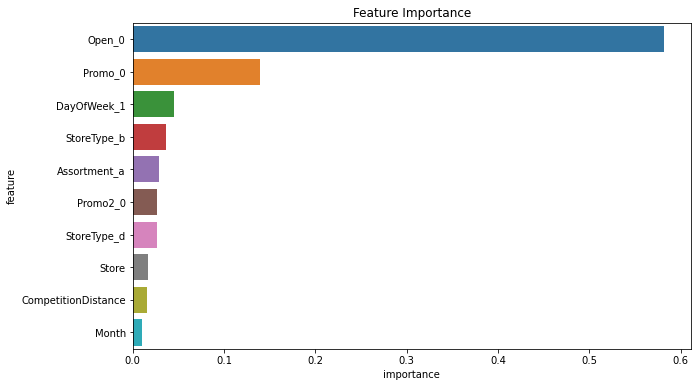

In [99]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

In [100]:
from sklearn.model_selection import KFold
def train_and_evaluate(X_train,train_target,X_val,val_target,**params):
  model=XGBRegressor(random_state=42,n_jobs=-1,**params)
  model.fit(X_train,train_target)
  train_rmse=rmse(model.predict(X_train),train_target)
  val_rmse=rmse(model.predict(X_val),val_target)
  return model,train_rmse,val_rmse

In [101]:
kfold=KFold(n_splits=5,shuffle=True)

In [102]:
models=[]
for train_idxs,val_idxs in kfold.split(X):
  X_train,train_target = X.iloc[train_idxs], target.iloc[train_idxs]
  X_val,val_target=X.iloc[val_idxs] , target.iloc[val_idxs]
  model,train_rmse,val_rmse=train_and_evaluate(
      X_train,
      train_target,
      X_val,
      val_target,
      max_depth=4,
      n_estimators=20)
  models.append(model)
  print('Train RMSE {}, Validation RMSE{}'.format(train_rmse,val_rmse))

Train RMSE 2241.9944114236696, Validation RMSE2230.9657317759475
Train RMSE 2260.98966538107, Validation RMSE2258.188819458191
Train RMSE 2258.5579356533053, Validation RMSE2267.670618481164
Train RMSE 2234.1010221382926, Validation RMSE2251.1182044807038
Train RMSE 2240.3660386869897, Validation RMSE2232.6074551388924


In [103]:
X_test = merge_store_test_df.copy()
X_test.drop(['CompetitionOpenSince','lastpromo2date','Date','WeekOfYear','PromoInterval'], axis=1, inplace= True)
# target=merge_store_train_df['Sales']
test_preds=model.predict(X_test)

In [104]:
# test_preds
# new_df = pd.DataFrame(test_preds)
# new_df.columns = ['sales_test_preds']
# dfi.export(new_df.head(10), "new_df.png")
# new_df

In [105]:
merge_store_test_df['Sales'] = test_preds
merge_store_test_df

,Store,Date,CompetitionDistance,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,CompetitionOpenSince,...,Open_1,Promo_0,Promo_1,Promo2_0,Promo2_1,StateHoliday_0,StateHoliday_a,SchoolHoliday_0,SchoolHoliday_1,Sales
0,1,2015-09-17,1270.0,0,2015,9,17,38,84.0,2008-09-01,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,7070.521484
1,3,2015-09-17,14130.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0,2006-12-01,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,7238.171387
2,7,2015-09-17,24000.0,0,2015,9,17,38,29.0,2013-04-01,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,8624.427734
3,8,2015-09-17,7520.0,0,2015,9,17,38,11.0,2014-10-01,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,7098.416504
4,9,2015-09-17,2030.0,0,2015,9,17,38,181.0,2000-08-01,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,7790.506348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,2015-01-08,1900.0,"Jan,Apr,Jul,Oct",2015,1,8,2,7.0,2014-06-01,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4606.192383
41084,1112,2015-01-08,1880.0,0,2015,1,8,2,105.0,2006-04-01,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6709.601562
41085,1113,2015-01-08,9260.0,0,2015,1,8,2,28.0,2012-09-01,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6377.099121
41086,1114,2015-01-08,870.0,0,2015,1,8,2,28.0,2012-09-01,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,17841.025391


In [106]:
# dfi.export(merge_store_test_df.head(10), "final_merge_store_test_df.png",max_cols = -1)

In [107]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=30,30

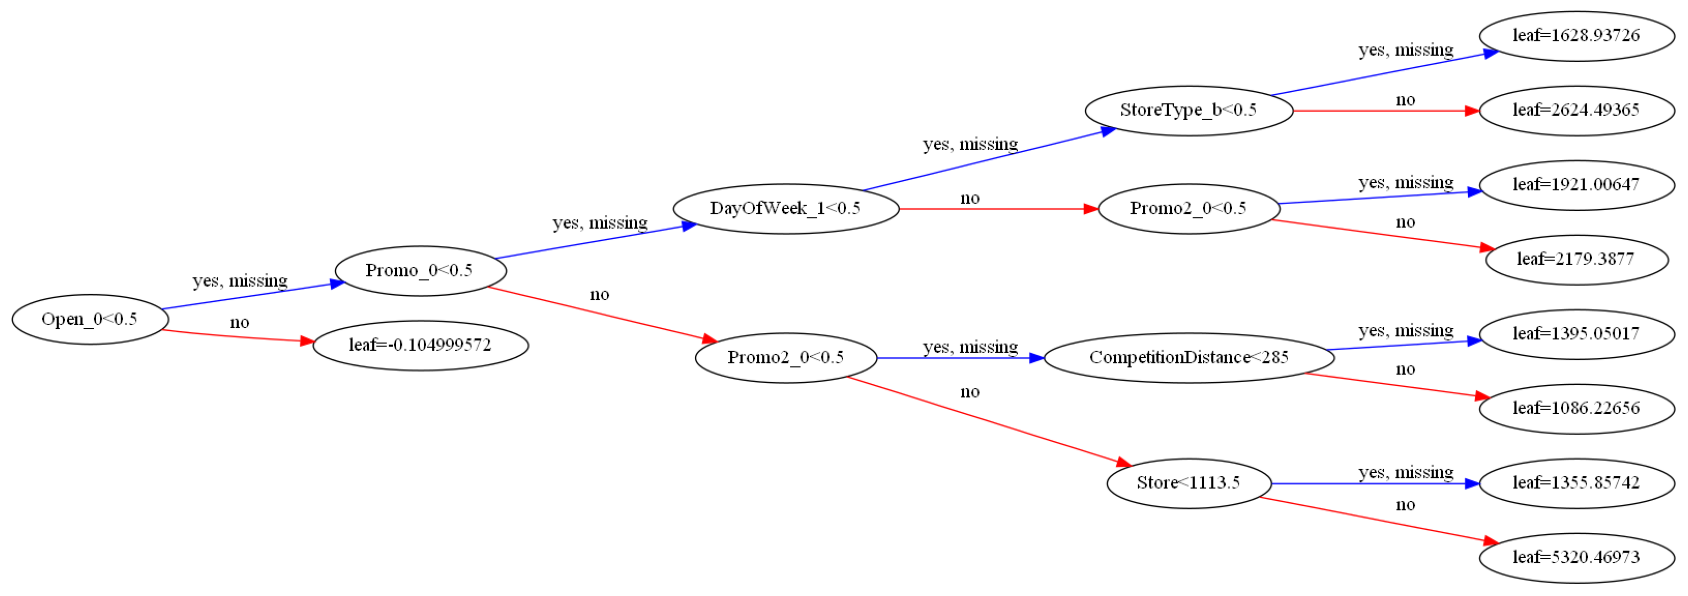

In [108]:
plot_tree(model,rankdir='LR',num_trees=1)
plt.savefig("tree.png")